########################################################################
#
# DATA ANALYSIS TEXTBOOK
# FUNDAMENTALS OF REGRESSION ANALYSIS
# ILLUSTRATION STUDY FOR CHAPTER 8
#
# data downloaded from a hotels price comparison site on October 27, 2017

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from mizani.formatters import percent_format
import os
from plotnine import *
import numpy as np
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"
# location folders
data_in = dirname + "da_data_repo/hotels-vienna/clean/"
data_out = dirname + "da_case_studies/ch08-hotels-measurement-error/"
output = dirname + "da_case_studies/ch08-hotels-measurement-error/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)
# Import the prewritten helper functions
from py_helper_functions import *

In [3]:
# load vienna
hotels=pd.read_csv(data_in+"hotels-vienna.csv")

In [4]:
hotels = (
    hotels.query('accommodation_type=="Hotel"')
    .query('city_actual=="Vienna"')
    .query("stars>=3 & stars<=4")
    .query("stars.notna()")
    .query("price<=600")
)

#############################
#### LOG MODELS
############################

In [5]:
hotels['lnprice']=np.log(hotels.price)
hotels['distance2']=hotels.distance
hotels.loc[hotels.distance2<0.05,'distance2']=0.05
hotels['lndistance']=np.log(hotels.distance2)

In [6]:
hotels.price.describe()

count    207.000000
mean     109.975845
std       42.221381
min       50.000000
25%       82.000000
50%      100.000000
75%      129.500000
max      383.000000
Name: price, dtype: float64

In [7]:
hotels.lnprice.describe()

count    207.000000
mean       4.640219
std        0.336751
min        3.912023
25%        4.406719
50%        4.605170
75%        4.863673
max        5.948035
Name: lnprice, dtype: float64

## Regression

In [8]:
reg1 = smf.ols('price ~ distance', data=hotels)
reg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     38.20
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           3.39e-09
Time:                        19:22:06   Log-Likelihood:                -1050.3
No. Observations:                 207   AIC:                             2105.
Df Residuals:                     205   BIC:                             2111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.0170      4.474     29.511      0.000     123.197     140.837
distance     -14.4064      2.331     -6.181      0.000     -19.002      -9.811
==============================================================================
Omnibus:                      141.994   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1560.025
Skew:                           2.497   Prob(JB):                         0.00
Kurtosis:                      15.488   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
reg2 = smf.ols('price ~ lndistance', data=hotels)
reg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     79.58
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           2.61e-16
Time:                        19:22:10   Log-Likelihood:                -1034.1
No. Observations:                 207   AIC:                             2072.
Df Residuals:                     205   BIC:                             2079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.4171      2.512     44.757      0.000     107.465     117.369
lndistance   -24.7683      2.777     -8.921      0.000     -30.243     -19.294
==============================================================================
Omnibus:                      175.079   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3501.545
Skew:                           3.084   Prob(JB):                         0.00
Kurtosis:                      22.182   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
reg3 = smf.ols('lnprice ~ distance', data=hotels)
reg3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     52.90
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           7.30e-12
Time:                        19:22:12   Log-Likelihood:                -44.160
No. Observations:                 207   AIC:                             92.32
Df Residuals:                     205   BIC:                             98.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8411      0.035    139.720      0.000       4.773       4.909
distance      -0.1313      0.018     -7.273      0.000      -0.167      -0.096
==============================================================================
Omnibus:                       28.470   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.450
Skew:                           0.746   Prob(JB):                     4.97e-11
Kurtosis:                       4.809   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
reg4 = smf.ols('lnprice ~ lndistance', data=hotels)
reg4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     102.6
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           8.18e-20
Time:                        19:22:15   Log-Likelihood:                -25.911
No. Observations:                 207   AIC:                             55.82
Df Residuals:                     205   BIC:                             62.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6615      0.019    241.926      0.000       4.623       4.699
lndistance    -0.2158      0.021    -10.130      0.000      -0.258      -0.174
==============================================================================
Omnibus:                       47.573   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.794
Skew:                           0.976   Prob(JB):                     1.08e-28
Kurtosis:                       6.335   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###############
# FIGURES 8.1

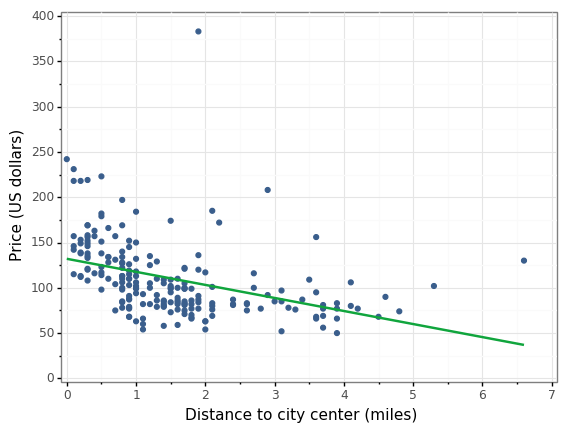

<ggplot: (8731501638199)>

In [17]:
ggplot(hotels, aes(x="distance", y="price")) + geom_point(color=color[0]) + geom_smooth(
    method="lm",color=color[1],se=False
) + expand_limits(x=0.01, y=0.01) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 7], breaks=seq(0, 8, 1)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 401, 50)
) + labs(
    x="Distance to city center (miles)", y="Price (US dollars)"
) + theme_bw()

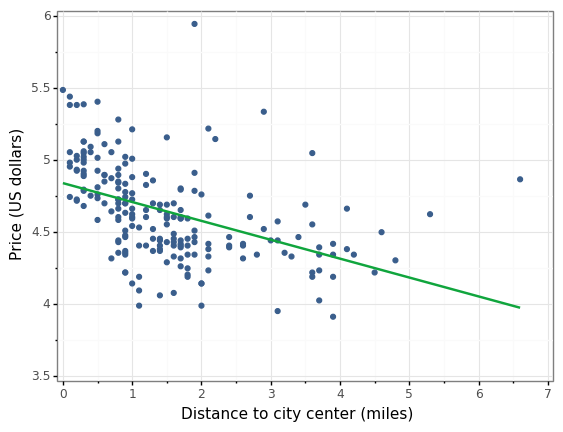

<ggplot: (8731500908002)>

In [19]:
ggplot(hotels, aes(x="distance", y="lnprice")) + geom_point(color=color[0]) + geom_smooth(
    method="lm",color=color[1],se=False
) + expand_limits(x=0.01, y=0.01) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 7], breaks=seq(0, 8, 1)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[3.5, 6], breaks=seq(3.5, 6.1, 0.5)
) + labs(
    x="Distance to city center (miles)", y="Price (US dollars)"
) + theme_bw()

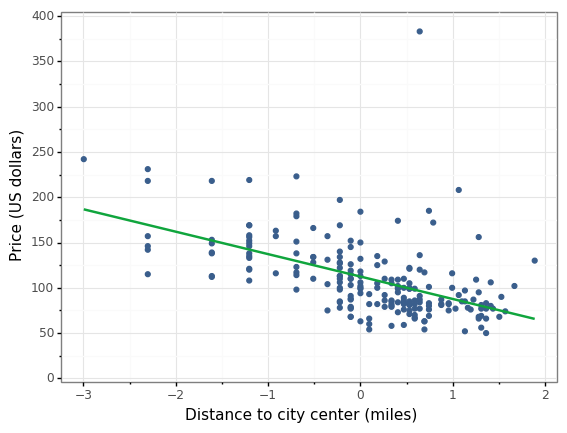

<ggplot: (8731500874072)>

In [21]:
ggplot(hotels, aes(x="lndistance", y="price")) + geom_point(color=color[0]) + geom_smooth(
    method="lm",color=color[1],se=False
) + expand_limits(x=0.01, y=0.01) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 400], breaks=seq(0, 401, 50)
) + labs(
    x="Distance to city center (miles)", y="Price (US dollars)"
) + theme_bw()

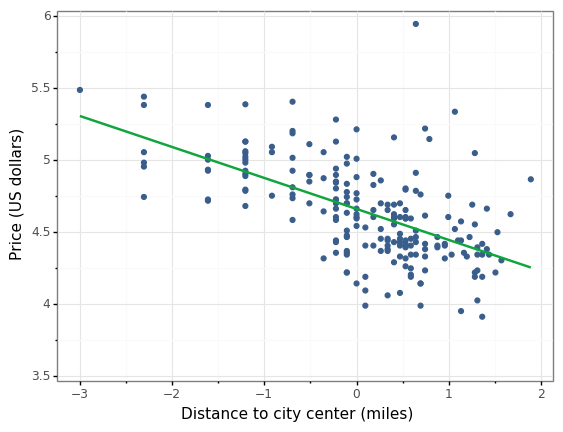

<ggplot: (8731500860609)>

In [22]:
ggplot(hotels, aes(x="lndistance", y="lnprice")) + geom_point(color=color[0]) + geom_smooth(
    method="lm",color=color[1],se=False
) + expand_limits(x=0.01, y=0.01) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[3.5, 6], breaks=seq(3.5, 6.1, 0.5)
) + labs(
    x="Distance to city center (miles)", y="Price (US dollars)"
) + theme_bw()